<a href="https://colab.research.google.com/github/glosophy/Facial-Expression/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network**

The model architecture chosen for this image classification task is a simple convolutional network that consists of three Conv2D layers with max pooling, followed by a fully-connected layer that finally outputs the probability for each of the seven classes.

The model performed better under the Adam optimizer compared to SGD.

In [146]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


Import libraries

In [147]:
import os, glob
import numpy as np
from collections import Counter
from keras.utils import to_categorical
from sklearn import preprocessing
import collections
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, MaxPooling2D

See Kaggle folder content:

In [148]:
path = '/gdrive/My Drive/Colab Notebooks/Facial-Expression/facial-expression/'
os.listdir(path)

['fer2013',
 'example_submission.csv',
 'fer2013.tar.gz',
 'icml_face_data.csv',
 'test.csv',
 'train.csv']

### **Data loading**

In [149]:
import pandas as pd

df = pd.read_csv(path+'icml_face_data.csv')

df.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


Prepare and split data into train, test, and validation

In [150]:
training = df[df[' Usage'] == 'Training']
test = df[df[' Usage'] == 'PublicTest']
validation = df[df[' Usage'] == 'PrivateTest']

In [151]:
def getImgLabel(df1):
  '''It returns images and labels for each dataframe'''

  labels = []
  images = []
  
  df1.reset_index(drop=True, inplace=True)

  for j in range(len(df1)):
    image = np.fromstring(df1.loc[j, ' pixels'], dtype=int, sep=' ')
    image = np.reshape(image, (48, 48))
    images.append(image)
  labels.append(df1['emotion'].tolist())

  return np.array(labels[0]), np.array(images)

In [152]:
train_labels, train_images = getImgLabel(training)
test_labels, test_images = getImgLabel(test)
val_labels, val_images = getImgLabel(validation)

In [153]:
print('Train images count:', len(train_images))
print('Train labels count:', len(train_labels))
print('')
print('Test images count:', len(test_images))
print('Test labels count:', len(test_labels))
print('')
print('Validation images count:', len(val_images))
print('Validation images count:', len(val_labels))

Train images count: 28709
Train labels count: 28709

Test images count: 3589
Test labels count: 3589

Validation images count: 3589
Validation images count: 3589


In [154]:
count_train = Counter(train_labels)
lists = sorted(count_train.items()) # sorted by key, return a list of tuples
print(lists)

[(0, 3995), (1, 436), (2, 4097), (3, 7215), (4, 4830), (5, 3171), (6, 4965)]


### **Building the model**

Prepare data to fit in CNN

In [155]:
train_images = (train_images.reshape((train_images.shape[0], 48, 48, 1))).astype('float32')/255
val_images = (val_images.reshape((val_images.shape[0], 48, 48, 1))).astype('float32')/255
test_images = (test_images.reshape((test_images.shape[0], 48, 48, 1))).astype('float32')/255

In [156]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)

Build CNN

In [157]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [158]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 46, 46, 128)       1280      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
global_average_pooling2d_13  (None, 256)             

In [159]:
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    epochs=20,
                    batch_size=64)

Epoch 1/20
449/449 [==============================] - 3s 7ms/step - loss: 1.7958 - accuracy: 0.2508 - val_loss: 1.7855 - val_accuracy: 0.2516
Epoch 2/20
449/449 [==============================] - 3s 6ms/step - loss: 1.7609 - accuracy: 0.2731 - val_loss: 1.7177 - val_accuracy: 0.3001
Epoch 3/20
449/449 [==============================] - 3s 6ms/step - loss: 1.6598 - accuracy: 0.3330 - val_loss: 1.5868 - val_accuracy: 0.3692
Epoch 4/20
449/449 [==============================] - 3s 6ms/step - loss: 1.5399 - accuracy: 0.4000 - val_loss: 1.5026 - val_accuracy: 0.4046
Epoch 5/20
449/449 [==============================] - 3s 6ms/step - loss: 1.4458 - accuracy: 0.4467 - val_loss: 1.4123 - val_accuracy: 0.4556
Epoch 6/20
449/449 [==============================] - 3s 6ms/step - loss: 1.3837 - accuracy: 0.4760 - val_loss: 1.3745 - val_accuracy: 0.4695
Epoch 7/20
449/449 [==============================] - 3s 6ms/step - loss: 1.3343 - accuracy: 0.4935 - val_loss: 1.3400 - val_accuracy: 0.4890
Epoch 

### **Evaluating the model**

Plot the accuracies

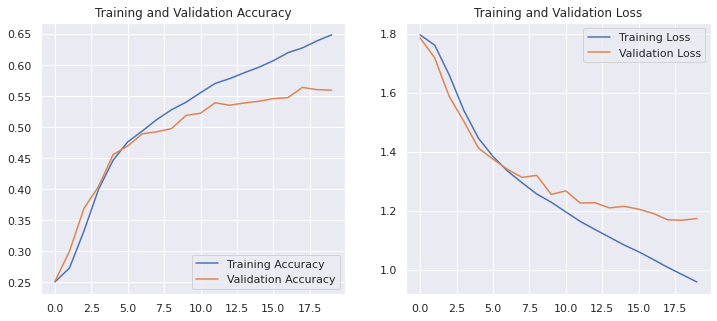

In [160]:
# visualize the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Final accuracy

In [161]:
scores = model.evaluate(test_images, test_labels, verbose=False)
print(f'Test accuracy: {scores[1]}')

Test accuracy: 0.5736973881721497


Confussion matrix

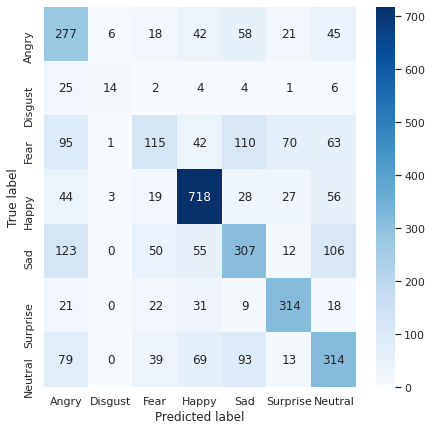

In [162]:
# https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns

classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

y_pred = model.predict(test_images)
y_pred = np.asarray([np.argmax(e) for e in y_pred])
y_true = np.asarray([np.argmax(e) for e in test_labels])

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm, annot=True,  
                 cmap='Blues', yticklabels=classes,
                 xticklabels=classes, vmin=0,
                 vmax=np.max(cm), fmt=".0f")
ax.set(xlabel='Predicted label', ylabel='True label')
plt.show()

Classification report

In [163]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

       Angry       0.42      0.59      0.49       467
     Disgust       0.58      0.25      0.35        56
        Fear       0.43      0.23      0.30       496
       Happy       0.75      0.80      0.77       895
         Sad       0.50      0.47      0.49       653
    Surprise       0.69      0.76      0.72       415
     Neutral       0.52      0.52      0.52       607

    accuracy                           0.57      3589
   macro avg       0.56      0.52      0.52      3589
weighted avg       0.57      0.57      0.56      3589

